In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy import optimize

**CHARGEMENT ET VISUALISATION DES DONNEES**

(22, 2)
(68, 2)
(90, 2)
(30, 2)


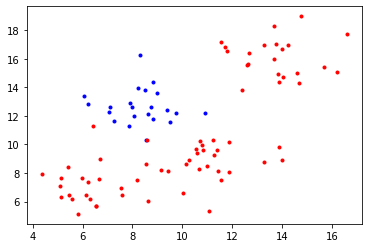

In [42]:

X_train, y_train, X_test, y_test = np.load("TP4.npy",allow_pickle=True )

T_train = X_train[np.where(y_train==1),:] 
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] ))


F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))




plt.plot(F_train[:,0], F_train[:,1], '.b') 
print(np.shape(F_train))
plt.show 
plt.plot(T_train[:,0], T_train[:,1], '.r') 
print(np.shape(T_train))
plt.show
print(np.shape(X_train))
print(np.shape(X_test))

**Combien y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la dimension des données ?**
il y a 90 points dans la base de test a deux dimensions et 30 a deux dim dans la base de test


# ESTIMATION DENSITE PROB

norm2 va rendre la fonction qui renvoie l’estimation de la densité de probabilité en un point 𝒙.

La formule de Parzen a pour rappel :

![Texte alternatif…](https://wikimedia.org/api/rest_v1/media/math/render/svg/a66c0e14eac7d4f30f80c4263dd4ad935620ca4f)

In [0]:
def norm2(x, m, cov):
	  a = np.dot( np.transpose((x-m)), np.linalg.inv(cov) )
	  a = np.dot( a, (x-m) )
	  p = 1 / ( math.sqrt(2*math.pi*np.linalg.det(cov)) ) * math.exp( -0.5*a )
	  return p
def ddp_parzen(x,X,cov):
    P = 0
    for i in range(len(X)):
        P = P + norm2(x,X[i],cov)
    P = P / X.shape[0]
    return P


**Rappeler le principe de fonctionnement de l’estimation de densité de probabilité par noyau. Que représente le noyau ?**
l’estimation par noyau (ou encore méthode de Parzen-Rosenblatt) est une méthode non-paramétrique d’estimation de la densité de probabilité d’une variable aléatoire

le noyau K (généralement la densité d'une loi statistique) 

Pour les ddp, on va 'grider' nos données en faisant du 20*20=400 cases et calculer dans chacune des cases la ddp avec nos données

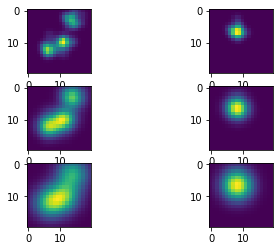

In [64]:
p1 = np.zeros((20,20))
p2 = np.zeros((20,20))

for s in range(1,4):
  for x in range(20):
    for y in range(20):
      cov = np.array([[s*s,0],[0,s*s]])
      p1[y,x] = ddp_parzen([x,y], T_train, cov)
      p2[y,x] = ddp_parzen([x,y], F_train, cov)

  plt.subplot(3,2,2*abs(s)-1)
  plt.imshow(np.flipud(p1))
  plt.subplot(3,2,2*abs(s))
  plt.imshow(np.flipud(p2))

**Comment varient les ddp en fonction de cov ? Etait-ce prévisible ? A priori et sans faire le test, quelle valeur de cov pensez-vous adéquate pour faire la classification ?**

plus cov est important plus la zone de p1 et p2 prennent de la place , on va chercher un cov tq les zones de p1 et p2 soient à l'image de  notre nuage de points. On remarque qu'a 2 on a une bonne representation de nos t_train / f_train.

# classification bayesienne

In [0]:
def classif_bay(s,X):

    cov = np.array([[s*s,0],[0,s*s]])
    y = np.zeros(len(y_test))

    for i in range(len(X)):
      P0 = ddp_parzen(X[i], T_train, cov)
      P1 = ddp_parzen(X[i], F_train, cov)
      if P0 > P1:
          y[i] = 1

    return y


In [50]:
for s in np.arange(0.5, 5.5, 0.5):
  y = classif_bay(s,X_test)
  matrix = metrics.confusion_matrix(y,y_test) #y-> truth et y_test test....
  taux = np.trace(matrix) / np.sum(matrix)
  print (taux*100)

90.0
90.0
90.0
90.0
83.33333333333334
83.33333333333334
80.0
76.66666666666667
76.66666666666667
73.33333333333333


on s'aperçoit que le taux de reconnaissance diminue plus notre variance s grandit..On va alors optimiser la recherche de s (normalement les doux souvenirs du semestre 1 doivent revenir avec la fabuleuse madame Ossart mais surtout en lettres clignotantes et en gros dans le cerveau : 
d i c h o t o m i e

In [0]:
def minimisation( xMin , xMax , eps ):

    iteration = 0
    y = [0]*5
    while (xMax - xMin > eps):
        
        # 5 points equidistants sur l'abscisse et leur valeur sur l'ordonnee
        x = np.linspace(xMin,xMax,5)
        for i in range(5):
            y[i] = matrice_confustion( y_test , classif_bay(x[i], X_test) )

        # Indice du minimum
        n = np.argmax( y )
        print("Taux =",y[n])

        # Cas extremes (fonctions monotones par exemple)
        if n == 0:
            xMin = x[n]
        else:
            xMin = x[n-1]
            
        if n == 4:
            xMax = x[n]
        else:
            xMax = x[n+1]
        
        iteration += 1

    return x[n]

In [58]:
xMin, xMax, eps = -4 , 6 , 0.001
m = minimisation( xMin , xMax , eps )
print("On seuille a",m,"pour le meilleur taux de reconnaissance")

Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
Taux = 0.9
On seuille a -2.18634033203125 pour le meilleur taux de reconnaissance


en jouant un peu avec les valeurs de xmin et xmax, on trouve que le meilleur seuil se trouve aux environs de -2

---

